In [23]:
from ultralytics import YOLO

In [24]:
model=YOLO(os.path.join('segmentation','best.pt'))

In [25]:
result=model.predict('pizza2.jpg',conf=.5)


image 1/1 c:\Users\deyar\OneDrive\Desktop\yolov8\pizza2.jpg: 640x640 1 pizza, 348.6ms
Speed: 17.2ms preprocess, 348.6ms inference, 16.5ms postprocess per image at shape (1, 3, 640, 640)


In [26]:
import os

In [27]:
result=model.predict('pizza2.jpg',conf=.5)
for i in result:
    i.save(os.path.join('predImage','yolo.jpg'))


image 1/1 c:\Users\deyar\OneDrive\Desktop\yolov8\pizza2.jpg: 640x640 1 pizza, 212.7ms
Speed: 5.6ms preprocess, 212.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


In [28]:
img=cv.imread(os.path.join('predImage','yolo.jpg'))

In [29]:
type(img)

numpy.ndarray

In [30]:
import matplotlib.pyplot as pl

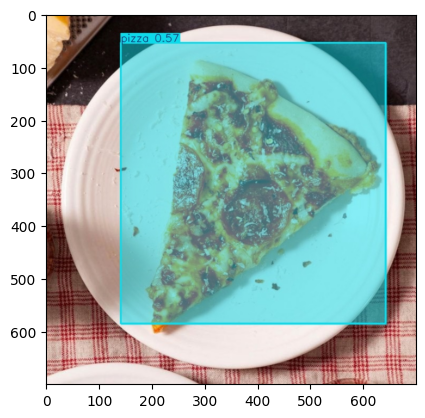

In [31]:
pl.imshow(img[:,:,::-1])

In [2]:
from flask import render_template,request,Flask

In [3]:
from PIL import Image

In [4]:
import io

In [5]:
import cv2 as cv

In [6]:
import base64

In [7]:
import numpy as np

In [8]:
app=Flask(__name__,template_folder='demo/')
model=YOLO('best.pt')
UPLOAD_FOLDER = 'uploads/'
app.config['UPLOAD_FOLDER']=UPLOAD_FOLDER
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
@app.route ('/')
def home():
    return render_template('test.html')
@app.route('/pred', methods=['POST'])
def marks():
    file=request.files['image']
    file.save(os.path.join('uploads',file.filename))
    file_path=os.path.join('uploads',file.filename)
    image=cv.imread(file_path) #load image
    result=model.predict(image,conf=.5)
    os.makedirs('predImage/', exist_ok=True)
    for i in result:
        i.save(os.path.join('predImage',file.filename))
    img=cv.imread(os.path.join('predImage',file.filename))
    segmented_image=Image.fromarray(img[:,:,::-1])
    buffered = io.BytesIO()
    segmented_image.save(buffered, format="JPEG")
    buffered.seek(0)
    img_str = base64.b64encode(buffered.getvalue()).decode() #encoding 
    img2=cv.imread(file_path)
    image2=Image.fromarray(img2[:,:,::-1])
    buffered = io.BytesIO() #create object
    image2.save(buffered, format="JPEG") #save in bytes    
    plot_url1= base64.b64encode(buffered.getvalue()).decode()
    return render_template('res.html',x=img_str,y=plot_url1)

NameError: name 'YOLO' is not defined

In [59]:
if __name__=='__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [13/Sep/2024 09:58:41] "GET / HTTP/1.1" 200 -



0: 640x640 1 pizza, 159.9ms
Speed: 4.5ms preprocess, 159.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


127.0.0.1 - - [13/Sep/2024 09:58:48] "POST /pred HTTP/1.1" 200 -


In [38]:
os.system('ffmpeg -i road.mp4 -r 1 frame/frame_%d.jpg')

0

In [ ]:
for i in os.listdir('frame'):
    path=os.path.join('frame',i)
    res=model.predict(path)

In [11]:
import os

In [59]:
from PIL import Image

In [76]:
app=Flask(__name__,template_folder='demo/')
UPLOAD_FOLDER = 'uploads/'
app.config['UPLOAD_FOLDER']=UPLOAD_FOLDER
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
@app.route ('/')
def home():
    return render_template('vx.html')
@app.route('/pred', methods=['POST'])
def marks():
    file=request.files['video']
    file.save(os.path.join('uploads',file.filename))
    file_path=os.path.join('uploads',file.filename)
    os.makedirs('frame/',exist_ok=True)
    os.system(f'ffmpeg -i {file_path} -r 1 frame/%d_frame.jpg')
    name=sorted([i for i in os.listdir('frame/')],reverse=False)
    m=[]
    for x in name:
        path=os.path.join('frame',x)
        with Image.open(path) as img:
            img_io=io.BytesIO()
            img.save(img_io, format='png')
            img_io.seek(0)
            encoded_img = base64.b64encode(img_io.getvalue()).decode('utf-8')
            v=m.append(encoded_img)
    return render_template('vy.html',y=v)

In [1]:
from flask import Flask, render_template, request, redirect, url_for
import io
import base64

app = Flask(__name__,template_folder='demo/')

# To store the uploaded video data
video_data = None

@app.route('/')
def index():
    return render_template('vx.html')

@app.route('/upload', methods=['POST'])
def upload_video():
    global video_data
    if 'video' not in request.files:
        return 'No video uploaded', 400
    
    file = request.files['video']
    
    # Read video into bytes
    video_stream = io.BytesIO(file.read())
    
    # Convert the video into base64 to render in HTML
    video_data = base64.b64encode(video_stream.getvalue()).decode('utf-8')

    return redirect(url_for('view_video'))

@app.route('/view')
def view_video():
    if video_data is None:
        return 'No video uploaded yet', 400
    
    return render_template('vy.html', video_data=video_data)


In [2]:
if __name__=='__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [15/Sep/2024 07:37:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Sep/2024 07:37:22] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [15/Sep/2024 07:37:27] "POST /upload HTTP/1.1" 302 -
127.0.0.1 - - [15/Sep/2024 07:37:27] "GET /view HTTP/1.1" 200 -


In [4]:
import cv2 as cv
import os

In [15]:
cap=cv.VideoCapture(os.path.join('uploads','road.mp4'))
while True:
    ret,frame=cap.read()
    frame=cv.resize(frame,(600,400))
    rgb=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    cv.imshow('car',rgb)
    k=cv.waitKey(80)
    if k ==ord('q'):
        break
cap.release()
cv.destroyAllWindows()

In [13]:
import cv2 as cv

In [14]:
cap=cv.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()
    if ret==True:
        frame=cv.resize(frame,(600,400))
        frame=cv.flip(frame,1)
        #rgb=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
        cv.imshow('car',frame)
        k=cv.waitKey(80)
        if k ==ord('q'):
         break
cap.release()
cv.destroyAllWindows()


In [22]:
from flask import Flask, render_template, request, redirect, url_for
import os
import cv2 as cv

In [39]:
app = Flask(__name__,template_folder='demo/',static_folder='static')
app.config['UPLOAD_FOLDER'] = 'static/uploads/'
os.makedirs(app.config['UPLOAD_FOLDER'], exist_ok=True)
@app.route('/')
def index():
    return render_template('index.html')
@app.route('/upload', methods=['POST'])
def upload_video():
    video_file = request.files['video']
    video_path = os.path.join(app.config['UPLOAD_FOLDER'], video_file.filename)
    video_file.save(video_path)
    video_frames = split_video_into_frames(video_path)
    return render_template('display_frames.html', frames=video_frames)
def split_video_into_frames(video_path):
 cap=cv.VideoCapture(os.path.join(app.config['UPLOAD_FOLDER'],'road.mp4'))
 l=[]
 count=0
 while True:
    ret,frame=cap.read()
    if ret != True:
        break
    rgb=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    filename=f'frame{count}.jpg'
    path=os.path.join('frm',filename)
    cv.imwrite(path,frame)
    l.append(filename)
    count=count+1
 cap.release() 
 return l

In [3]:
from flask import Flask, render_template, Response, request, redirect, url_for
import cv2
import os
from ultralytics import YOLO

app = Flask(__name__, template_folder='demo')

# Folder to save uploaded videos
UPLOAD_FOLDER = 'static/uploads'
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Ensure upload folder exists
if not os.path.exists(UPLOAD_FOLDER):
    os.makedirs(UPLOAD_FOLDER)

# Load the YOLO model
model=YOLO(os.path.join('0bb.pt'))

# Route for the home page
@app.route('/')
def index():
    return render_template('index.html')

# Route to handle video upload
@app.route('/upload', methods=['POST'])
def upload_video():
    if 'file' not in request.files:
        return render_template('index.html')

    file = request.files['file']

    if file.filename == '':
        return render_template('index.html')

    if file:
        file_path = os.path.join(app.config['UPLOAD_FOLDER'], file.filename)
        file.save(file_path)
        return redirect(url_for('video_feed', filename=file.filename))

# Function to generate frames from video
def generate_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break

        # Convert the frame to RGB format
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Run the YOLO model on the frame
        results = model.track(frame_rgb, persist=True)

        # Extract the processed frame with bounding boxes (visualization)
        processed_frame = results[0].plot()

        # Convert back to BGR for OpenCV display
        #processed_frame_bgr = cv2.cvtColor(processed_frame, cv2.COLOR_RGB2BGR)

        # Encode the frame in JPEG format
        ret, buffer = cv2.imencode('.jpg', processed_frame)
        frame = buffer.tobytes()

        # Yield the frame in byte format to be streamed
        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')

    cap.release()
    cv2.destroyAllWindows()

# Route to stream the video
@app.route('/video_feed/<filename>')
def video_feed(filename):
    video_path = os.path.join(app.config['UPLOAD_FOLDER'], filename)
    return Response(generate_frames(video_path), mimetype='multipart/x-mixed-replace; boundary=frame')

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [18/Oct/2024 18:26:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2024 18:26:25] "POST /upload HTTP/1.1" 302 -



0: 384x640 1 car, 154.1ms
Speed: 4.4ms preprocess, 154.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


127.0.0.1 - - [18/Oct/2024 18:26:30] "GET /video_feed/road.mp4 HTTP/1.1" 200 -



0: 384x640 1 car, 56.1ms
Speed: 0.0ms preprocess, 56.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 43.7ms
Speed: 2.0ms preprocess, 43.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 39.6ms
Speed: 2.5ms preprocess, 39.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 43.2ms
Speed: 2.0ms preprocess, 43.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 39.1ms
Speed: 2.7ms preprocess, 39.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 37.0ms
Speed: 1.3ms preprocess, 37.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 41.6ms
Speed: 1.9ms preprocess, 41.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 39.3ms
Speed: 1.4ms preprocess, 39.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x64